In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

try:
    from google.colab import drive
    drive.mount('/content/drive')
    workding_dir = "/content/drive/MyDrive/logical-reasoning/"
except ModuleNotFoundError:
    workding_dir = str(Path.cwd().parent)

In [3]:
import os
import sys

os.chdir(workding_dir)
sys.path.append(workding_dir)
print("workding dir:", workding_dir)

workding dir: /Users/inflaton/code/engd/projects/logical-reasoning


In [4]:
from dotenv import find_dotenv, load_dotenv

found_dotenv = find_dotenv(".env")

if len(found_dotenv) == 0:
    found_dotenv = find_dotenv(".env.example")
print(f"loading env vars from: {found_dotenv}")
load_dotenv(found_dotenv, override=True)

loading env vars from: /Users/inflaton/code/engd/projects/logical-reasoning/.env


True

In [5]:
import pandas as pd

df = pd.read_csv("results/mgtv-results_internlm_4bit.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 21 columns):
 #   Column                                                     Non-Null Count  Dtype 
---  ------                                                     --------------  ----- 
 0   text                                                       3000 non-null   object
 1   label                                                      3000 non-null   object
 2   title                                                      3000 non-null   object
 3   puzzle                                                     3000 non-null   object
 4   truth                                                      3000 non-null   object
 5   internlm/internlm2_5-7b-chat-1m_4bit_rp1.0                 3000 non-null   object
 6   internlm/internlm2_5-7b-chat-1m_4bit_rp1.01                3000 non-null   object
 7   internlm/internlm2_5-7b-chat-1m_4bit_rp1.02                3000 non-null   object
 8   internlm/internlm2

In [6]:
df.columns.to_list()

['text',
 'label',
 'title',
 'puzzle',
 'truth',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.0',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.01',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.02',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.03',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.04',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.05',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.06',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.07',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.08',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.09',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.1',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.11',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.12',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.1300000000000001',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.1400000000000001',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.1500000000000001']

In [8]:
columns = df.columns[5:].to_list()
columns

['internlm/internlm2_5-7b-chat-1m_4bit_rp1.0',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.01',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.02',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.03',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.04',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.05',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.06',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.07',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.08',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.09',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.1',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.11',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.12',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.1300000000000001',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.1400000000000001',
 'internlm/internlm2_5-7b-chat-1m_4bit_rp1.1500000000000001']

In [9]:
import matplotlib.pyplot as plt
from matplotlib import rcParams


def plot_value_counts(df, column):
    font_family = rcParams["font.family"]
    # Set the font to SimHei to support Chinese characters
    rcParams["font.family"] = "STHeiti"
    rcParams["axes.unicode_minus"] = (
        False  # This is to support the minus sign in Chinese.
    )

    plt.figure(figsize=(12, 6))
    df[column].value_counts().plot(kind="bar")
    # add values on top of bars
    for i, v in enumerate(df[column].value_counts()):
        plt.text(i, v + 0.1, str(v), ha="center")
    plt.show()

    rcParams["font.family"] = font_family

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.0 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.0
不是      1592
是       1070
不重要      269
回答正确      35
问法错误      34
Name: count, dtype: int64


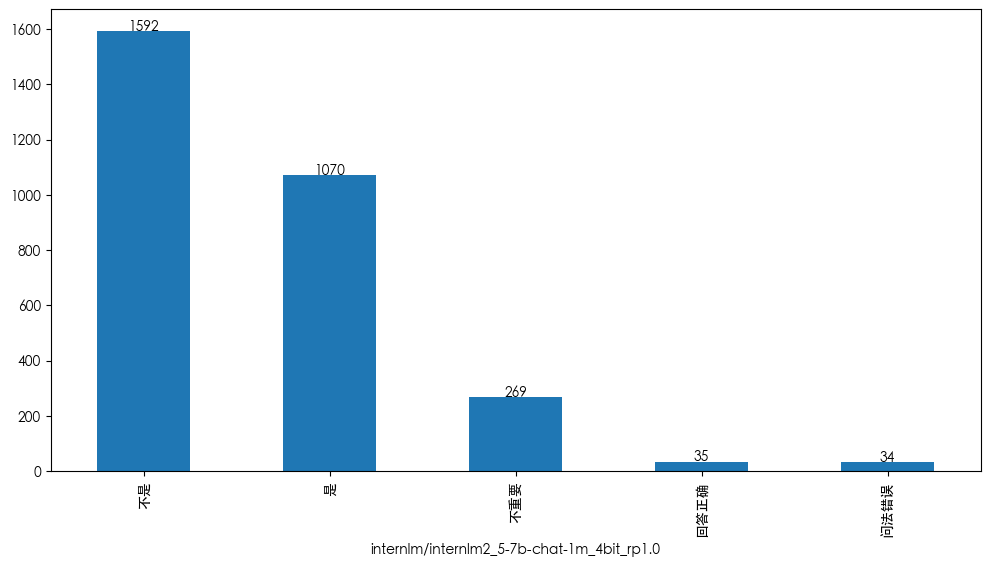

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.01 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.01
不是      1592
是       1070
不重要      269
回答正确      35
问法错误      34
Name: count, dtype: int64


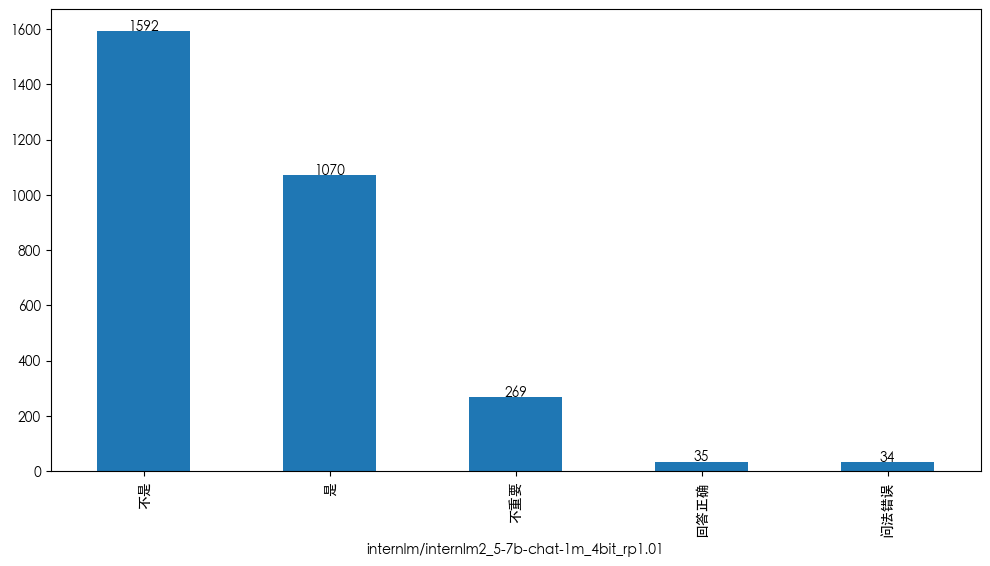

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.02 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.02
不是      1592
是       1070
不重要      269
回答正确      35
问法错误      34
Name: count, dtype: int64


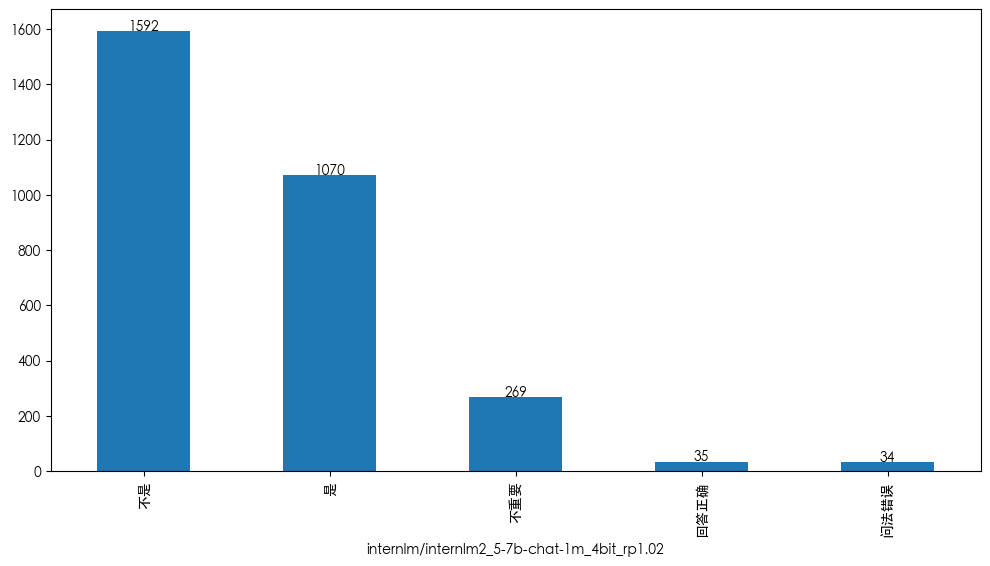

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.03 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.03
不是      1592
是       1070
不重要      269
回答正确      35
问法错误      34
Name: count, dtype: int64


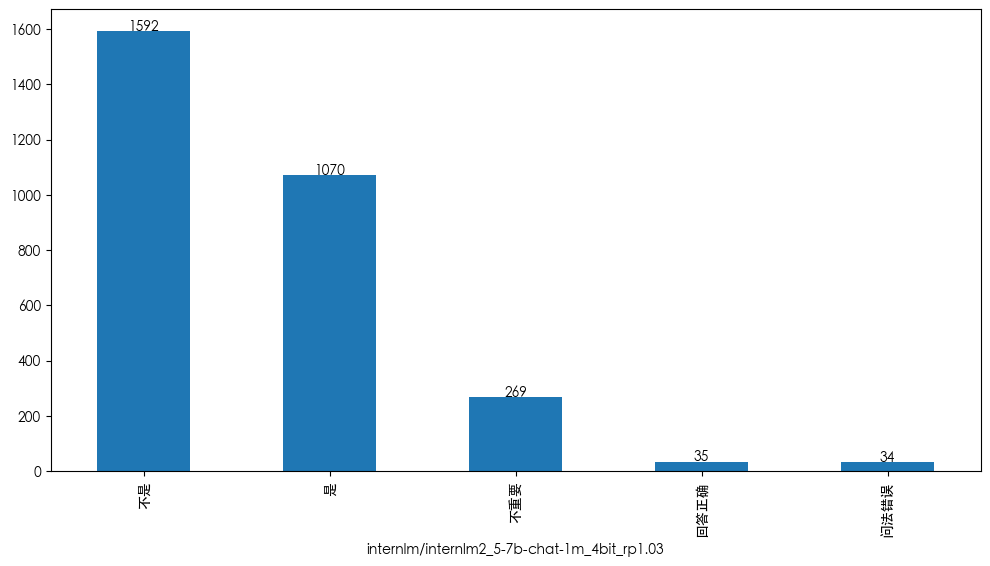

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.04 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.04
不是      1592
是       1070
不重要      269
回答正确      35
问法错误      34
Name: count, dtype: int64


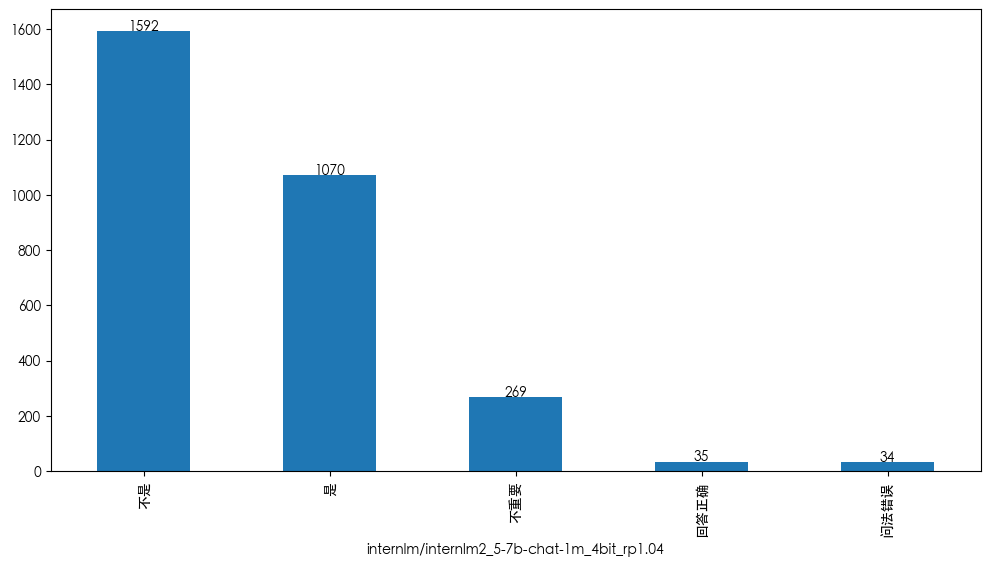

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.05 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.05
不是      1592
是       1070
不重要      269
回答正确      35
问法错误      34
Name: count, dtype: int64


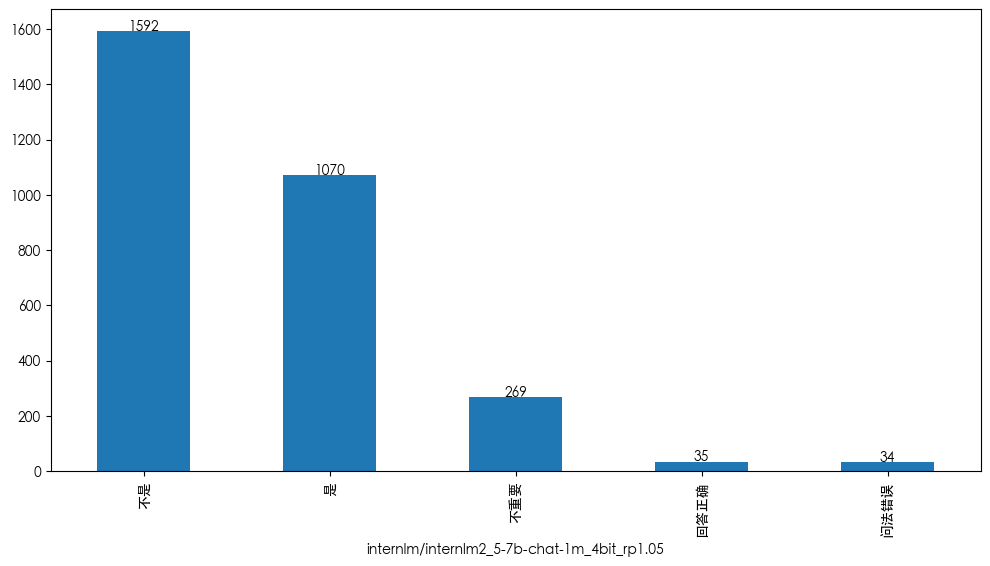

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.06 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.06
不是      1592
是       1070
不重要      269
回答正确      35
问法错误      34
Name: count, dtype: int64


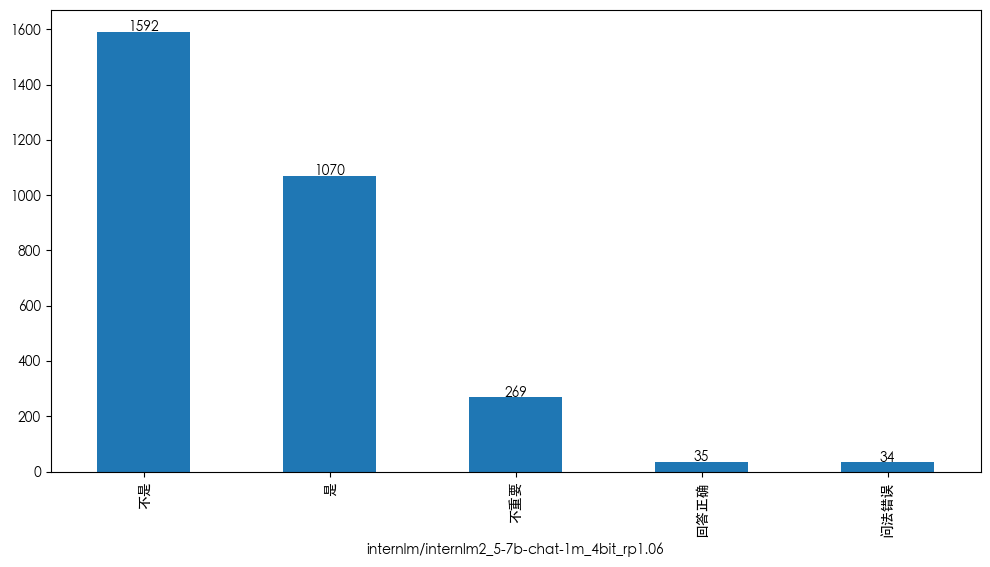

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.07 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.07
不是      1592
是       1070
不重要      269
回答正确      35
问法错误      34
Name: count, dtype: int64


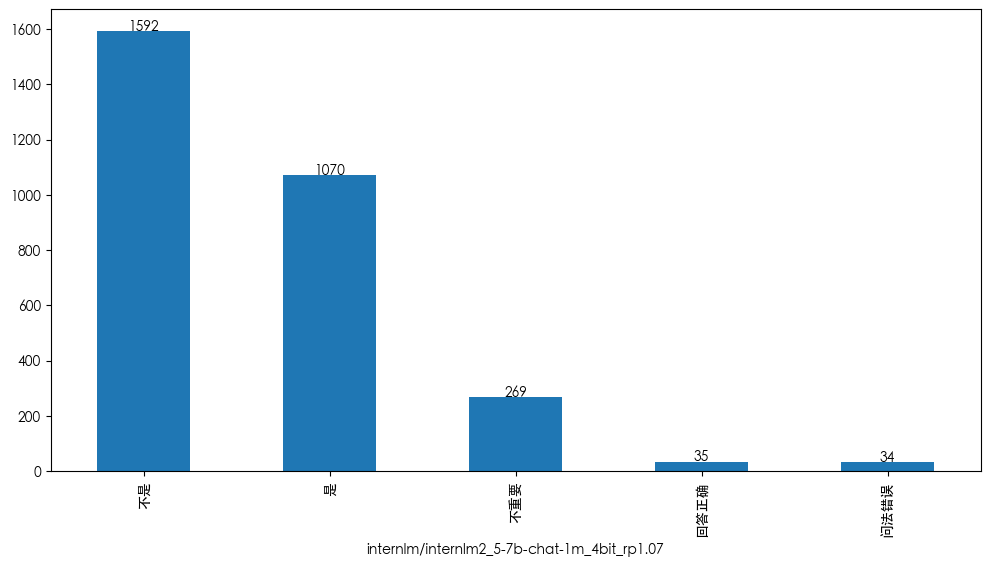

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.08 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.08
不是      1592
是       1058
不重要      269
回答正确      35
问法错误      34
是的        12
Name: count, dtype: int64


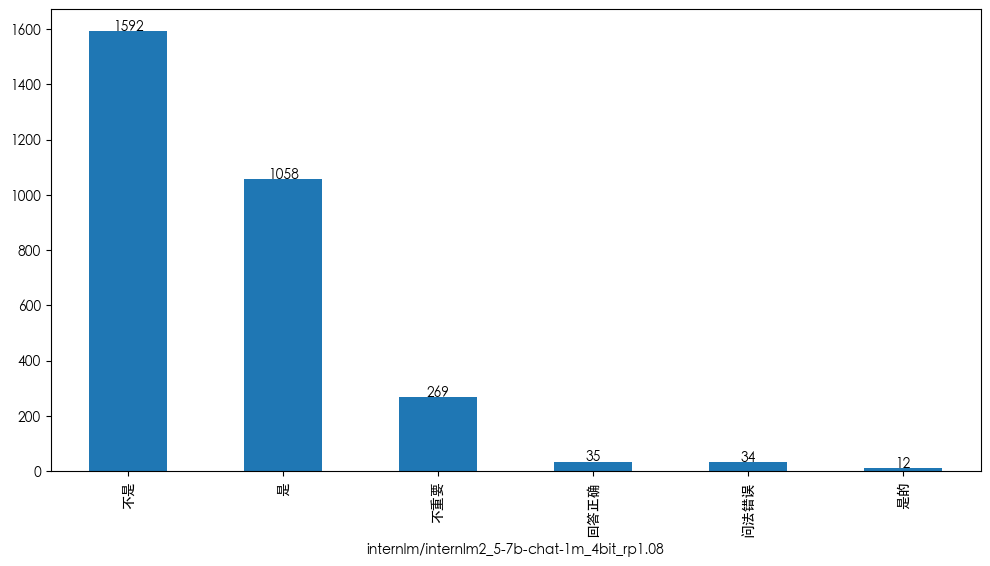

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.09 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.09
不是      1592
是        772
是的       271
不重要      269
回答正确      35
问法错误      34
重要        25
有          2
Name: count, dtype: int64


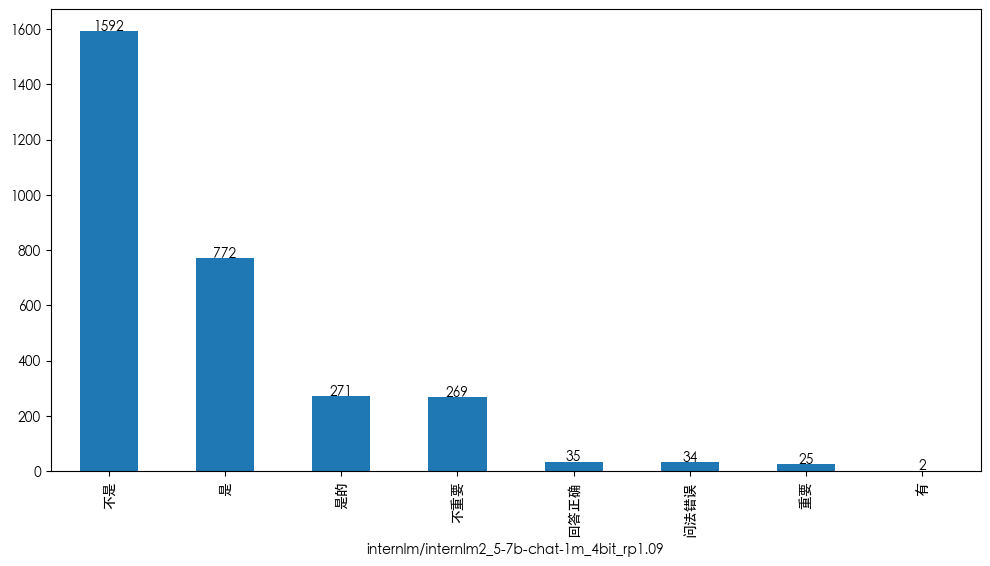

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.1 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.1
不是         1576
是的          606
不重要         267
是           242
重要          241
回答正确         35
问法错误         29
有             2
为他的爷爷而哭       1
是小男孩的         1
Name: count, dtype: int64


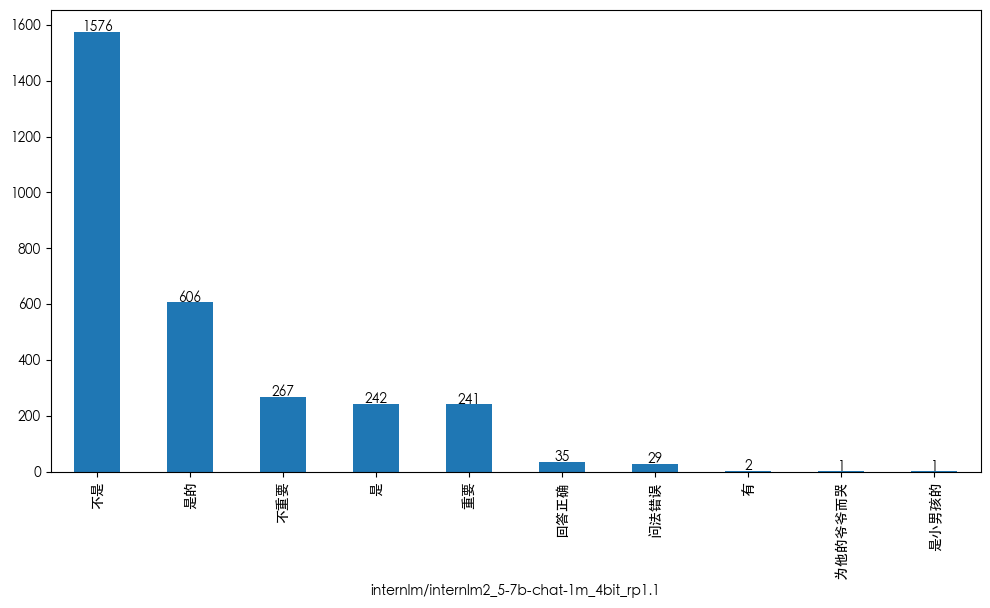

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.11 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.11
不是         1500
是的          653
重要          454
不重要         263
是            63
回答正确         35
问法错误         25
有             2
是小男孩          2
是小男孩的         2
为他的爷爷而哭       1
Name: count, dtype: int64


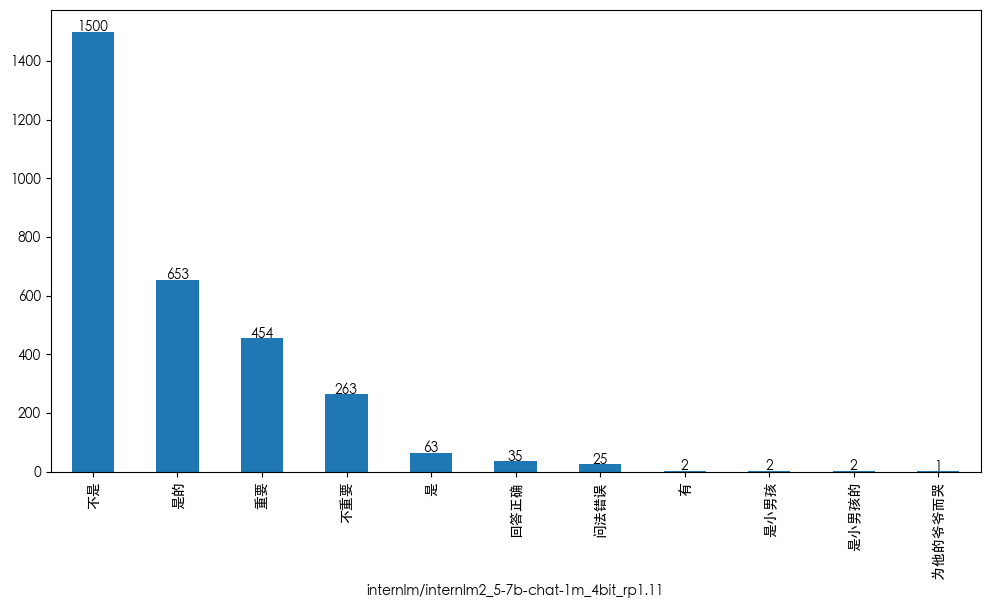

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.12 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.12
不是       1362
是的        671
重要        623
不重要       254
回答正确       34
是          25
问法错误       22
是小男孩        3
有           2
是小男孩的       2
为他的爷爷       1
男           1
Name: count, dtype: int64


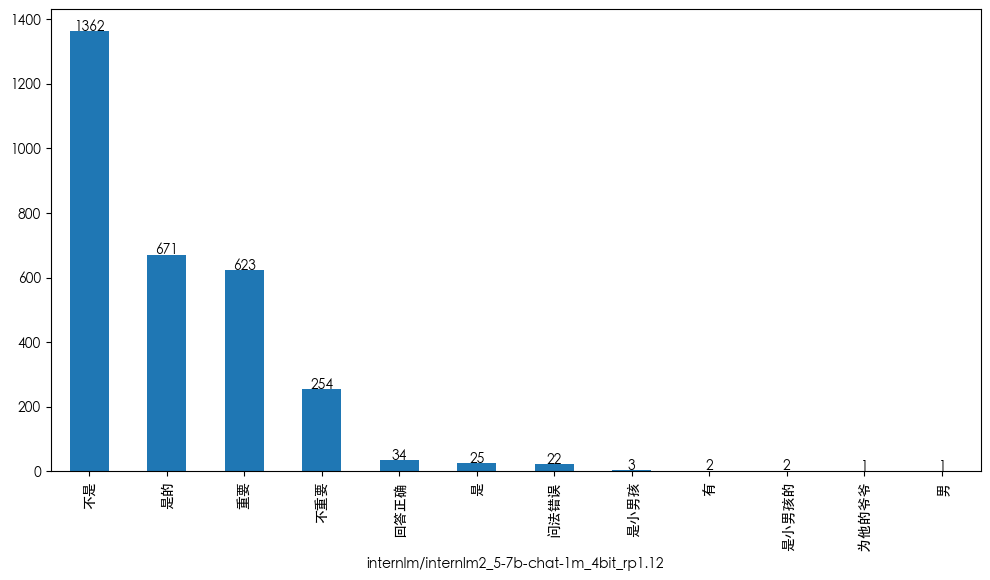

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.1300000000000001 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.1300000000000001
不是       1233
重要        776
是的        674
不重要       234
回答正确       34
问法错误       19
是          17
重要性不大       3
是小男孩        3
有           2
是小男孩的       2
为他的爷爷       1
没有          1
男           1
Name: count, dtype: int64


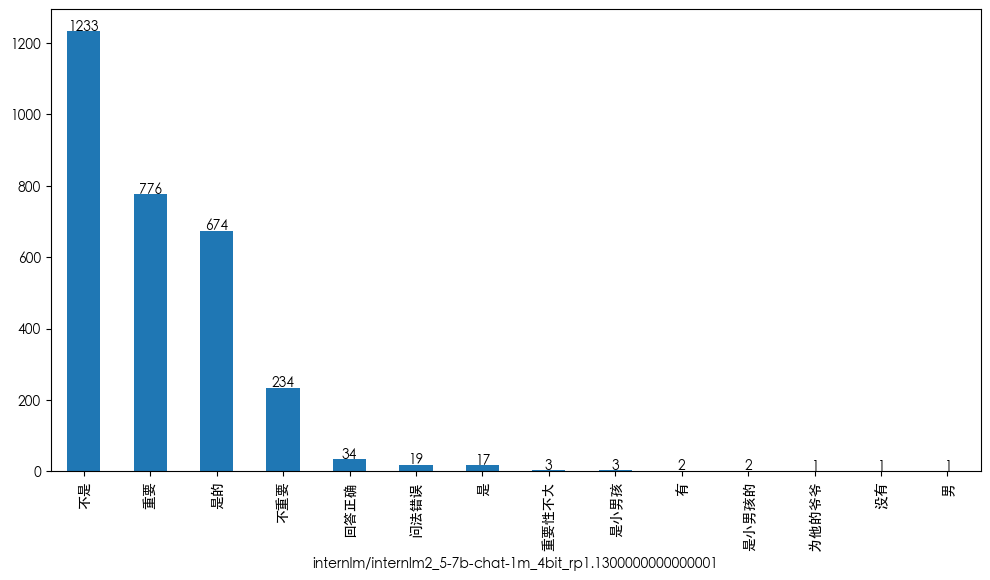

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.1400000000000001 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.1400000000000001
不是                    1058
重要                     989
是的                     678
不重要                    206
回答正确                    30
是                       13
问法错误                    11
重要性不大                    3
是小男孩                     3
没有                       2
有                        2
是小男孩的                    2
回答问题前需要澄清一点——学生并不是       1
为他的爷爷                    1
男                        1
Name: count, dtype: int64


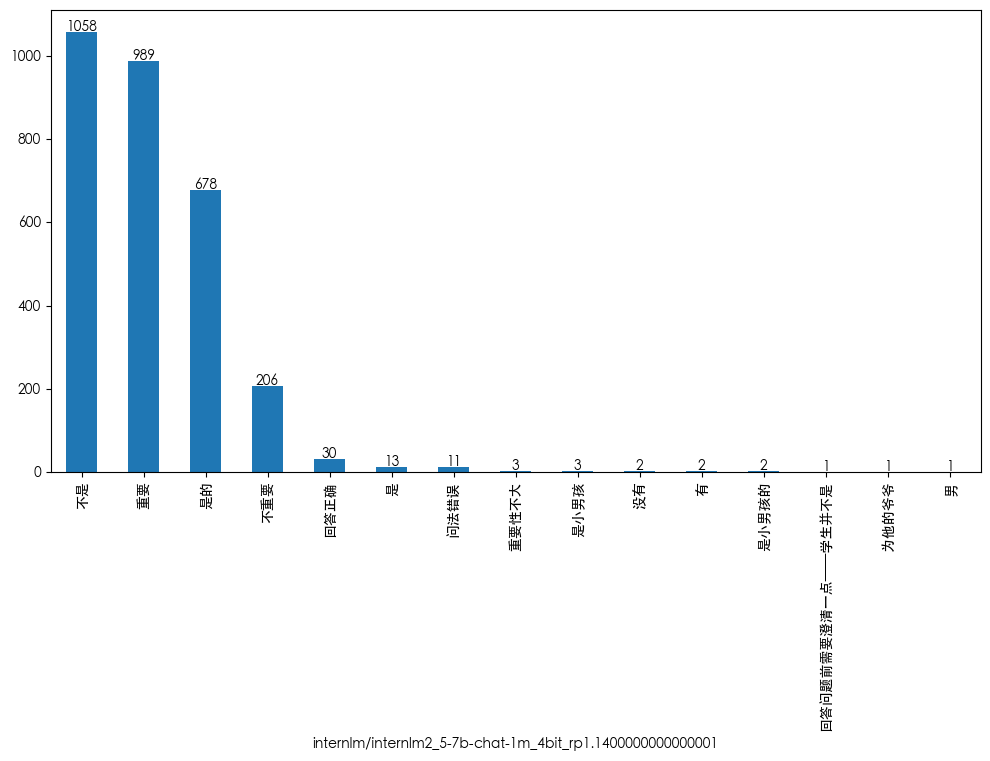

********** internlm/internlm2_5-7b-chat-1m_4bit_rp1.1500000000000001 **********
internlm/internlm2_5-7b-chat-1m_4bit_rp1.1500000000000001
重要                    1215
不是                     860
是的                     682
不重要                    179
回答正确                    25
问法错误                    11
重要性不大                    8
是                        5
是小男孩                     3
没有                       2
有                        2
回答问题时没有按照规定给出明确的回答       2
是小男孩的                    2
回答问题前需要澄清一点——学生并不是       1
回答问题前需要澄清一点,您的问题         1
为他的爷爷                    1
男                        1
Name: count, dtype: int64


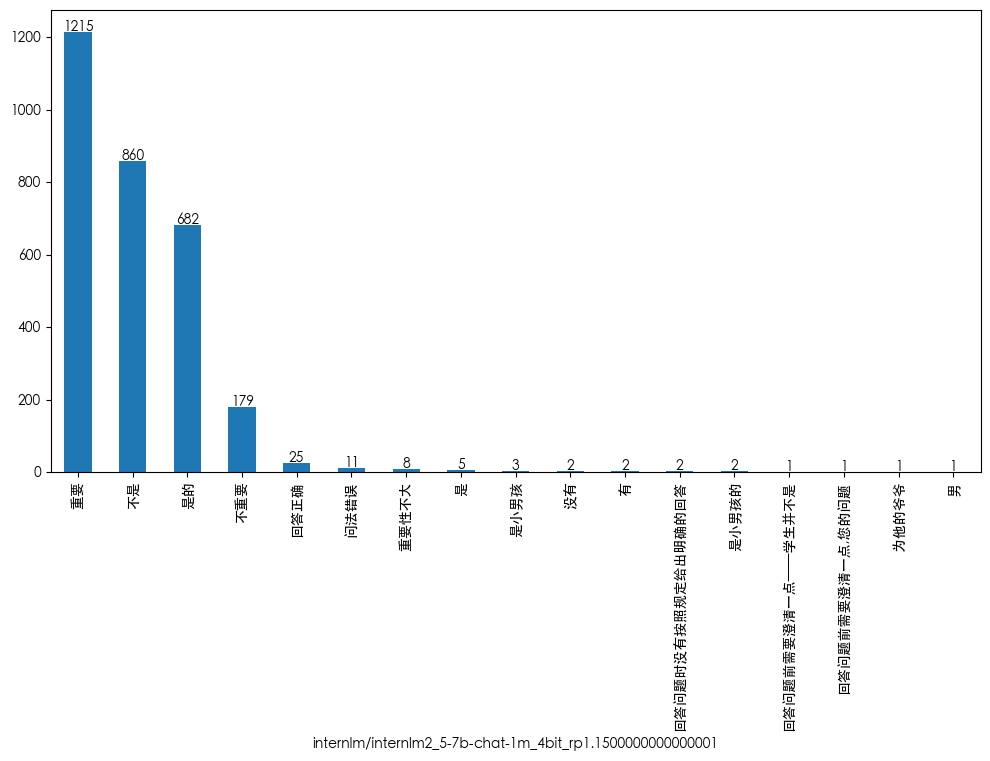

In [10]:
for col in columns:
    print("*" * 10, col, "*" * 10)
    print(df[col].value_counts())
    plot_value_counts(df, col)

In [11]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


def calc_metrics_for_col(df, col):
    y_true = df["label"]
    y_pred = df[col]
    try:
        accuracy = accuracy_score(y_true, y_pred)
        precision = precision_score(
            y_true, y_pred, average="weighted", labels=np.unique(y_pred)
        )
        recall = recall_score(
            y_true, y_pred, average="weighted", labels=np.unique(y_pred)
        )
        f1 = f1_score(y_true, y_pred, average="weighted", labels=np.unique(y_pred))
    except Exception as e:
        print(e)
        accuracy = precision = recall = f1 = np.nan

    return accuracy, float(precision), float(recall), float(f1)

In [12]:
import pandas as pd

perf_df = pd.DataFrame(
    columns=["repetition penalty", "model", "accuracy", "precision", "recall", "f1"]
)
for col in columns:
    accuracy, precision, recall, f1 = calc_metrics_for_col(df, col)
    rpp = col.split("_rp")[-1].split("0000")[0]
    new_model_metrics = {
        "repetition penalty": rpp if len(rpp) > 3 else rpp + "0",
        "model": col,
        "accuracy": accuracy,
        "precision": precision,
        "recall": recall,
        "f1": f1,
    }

    # Convert the dictionary to a DataFrame and concatenate it with the existing DataFrame
    perf_df = pd.concat([perf_df, pd.DataFrame([new_model_metrics])], ignore_index=True)

perf_df

/var/folders/7x/56svhln929zdh2xhr3mwqg4r0000gn/T/ipykernel_15485/1650792675.py:19: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  perf_df = pd.concat([perf_df, pd.DataFrame([new_model_metrics])], ignore_index=True)
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/inflaton/anaconda3/envs/logical-reasoning/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in 

repetition penalty                                              model  \
0                1.00         internlm/internlm2_5-7b-chat-1m_4bit_rp1.0   
1                1.01        internlm/internlm2_5-7b-chat-1m_4bit_rp1.01   
2                1.02        internlm/internlm2_5-7b-chat-1m_4bit_rp1.02   
3                1.03        internlm/internlm2_5-7b-chat-1m_4bit_rp1.03   
4                1.04        internlm/internlm2_5-7b-chat-1m_4bit_rp1.04   
5                1.05        internlm/internlm2_5-7b-chat-1m_4bit_rp1.05   
6                1.06        internlm/internlm2_5-7b-chat-1m_4bit_rp1.06   
7                1.07        internlm/internlm2_5-7b-chat-1m_4bit_rp1.07   
8                1.08        internlm/internlm2_5-7b-chat-1m_4bit_rp1.08   
9                1.09        internlm/internlm2_5-7b-chat-1m_4bit_rp1.09   
10               1.10         internlm/internlm2_5-7b-chat-1m_4bit_rp1.1   
11               1.11        internlm/internlm2_5-7b-chat-1m_4bit_rp1.11   
12               1.12        internlm/internlm2_5-7b-chat-1m_4bit_rp1.12   
13               1.13  internlm/internlm2_5-7b-chat-1m_4bit_rp1.13000...   
14               1.14  internlm/internlm2_5-7b-chat-1m_4bit_rp1.14000...   
15               1.15  internlm/internlm2_5-7b-chat-1m_4bit_rp1.15000...   

    accuracy  precision    recall        f1  
0   0.783000   0.808989  0.783000  0.791868  
1   0.783000   0.808989  0.783000  0.791868  
2   0.783000   0.808989  0.783000  0.791868  
3   0.783000   0.808989  0.783000  0.791868  
4   0.783000   0.808989  0.783000  0.791868  
5   0.783000   0.808989  0.783000  0.791868  
6   0.783000   0.808989  0.783000  0.791868  
7   0.783000   0.808989  0.783000  0.791868  
8   0.779667   0.809224  0.779667  0.790029  
9   0.694000   0.806940  0.694000  0.732054  
10  0.532000   0.790733  0.532000  0.565008  
11  0.470333   0.802988  0.470333  0.484614  
12  0.438000   0.854597  0.438000  0.462956  
13  0.407667   0.877739  0.407667  0.448352  
14  0.359333   0.885109  0.359333  0.420441  
15  0.301000   0.849374  0.301000  0.378686

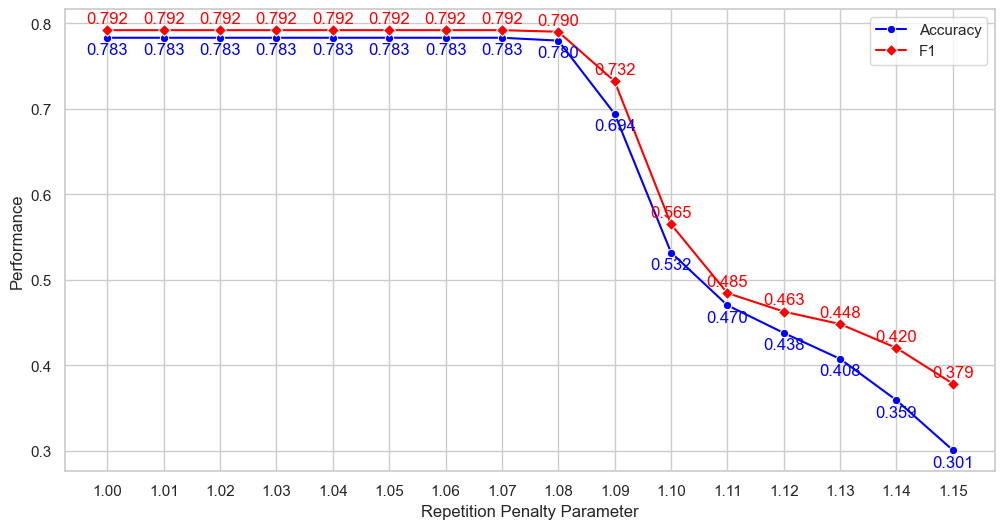

In [13]:
# plot accuracy and f1 vs repetition penalty
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns

sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(12, 6))

sns.lineplot(
    x="repetition penalty",
    y="accuracy",
    data=perf_df,
    ax=ax,
    color="blue",
    label="Accuracy",
    marker="o"
)

sns.lineplot(
    x="repetition penalty",
    y="f1",
    data=perf_df,
    ax=ax,
    color="red",
    label="F1",
    marker="D"
)

for line_index, line in enumerate(ax.lines):
    # Get the data
    line_color = line.get_color()
    xdata, ydata = line.get_data()
    for index in range(xdata.size):
        ax.annotate(
            f"{ydata[index]:.3f}",
            xy=(xdata[index], ydata[index]),
            textcoords="offset points",
            xytext=(
                0,
                5 if line_index % 2 == 1 else -12,
            ),  # Adjusted for better visibility
            ha="center",
            color=line_color,
        )

plt.xlabel("Repetition Penalty Parameter")
plt.ylabel("Performance")
plt.legend()
plt.show()

In [14]:
perf_df.to_csv("results/mgtv-results_internlm_4bit_metrics.csv", index=False)